In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

df = pd.read_csv('Datasets/covid_19_india.csv')

df.head()

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
df['Date'] = pd.to_datetime(df.Date)
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df['Time'] = pd.to_datetime(df.Time)
df['time_delta'] = (df['Time'] - df['Time'].min())  / np.timedelta64(1,'D')


df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date_delta,time_delta
0,1,2020-01-30,2020-04-29 18:00:00,Kerala,1,0,0,0,1,28.0,0.333333
1,2,2020-01-31,2020-04-29 18:00:00,Kerala,1,0,0,0,1,29.0,0.333333
2,3,2020-01-02,2020-04-29 18:00:00,Kerala,2,0,0,0,2,0.0,0.333333
3,4,2020-02-02,2020-04-29 18:00:00,Kerala,3,0,0,0,3,31.0,0.333333
4,5,2020-03-02,2020-04-29 18:00:00,Kerala,3,0,0,0,3,60.0,0.333333


In [13]:
data = df.values
X = data[:,9:11]
y = data[:,8]



X=np.array(X)
y = np.array(y)

y


array([1, 1, 2, ..., 51, 2043, 697], dtype=object)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
X_test

array([[87.0, 0.3958333333333333],
       [62.0, 0.3333333333333333],
       [102.0, 0.2916666666666667],
       [113.0, 0.2916666666666667],
       [116.0, 0.2916666666666667],
       [123.0, 0.3333333333333333],
       [184.0, 0.3333333333333333],
       [84.0, 0.3333333333333333],
       [109.0, 0.2916666666666667],
       [246.0, 0.2916666666666667],
       [88.0, 0.4791666666666667],
       [117.0, 0.2916666666666667],
       [111.0, 0.2916666666666667],
       [82.0, 0.3333333333333333],
       [102.0, 0.2916666666666667],
       [105.0, 0.2916666666666667],
       [74.0, 0.3333333333333333],
       [84.0, 0.3333333333333333],
       [87.0, 0.3958333333333333],
       [109.0, 0.2916666666666667],
       [62.0, 0.3333333333333333],
       [85.0, 0.0],
       [154.0, 0.3333333333333333],
       [106.0, 0.2916666666666667],
       [62.0, 0.3333333333333333],
       [116.0, 0.2916666666666667],
       [89.0, 0.4375],
       [337.0, 0.2916666666666667],
       [106.0, 0.29166666666666

In [9]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [10]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
989/989 [==============================] - 0s 241us/step - loss: 493195.8469
Epoch 2/20
989/989 [==============================] - 0s 79us/step - loss: 484645.3165
Epoch 3/20
989/989 [==============================] - 0s 70us/step - loss: 482801.1755
Epoch 4/20
989/989 [==============================] - 0s 63us/step - loss: 483420.5134
Epoch 5/20
989/989 [==============================] - 0s 63us/step - loss: 482197.0950
Epoch 6/20
989/989 [==============================] - 0s 63us/step - loss: 481278.7758
Epoch 7/20
989/989 [==============================] - 0s 63us/step - loss: 479914.7421
Epoch 8/20
989/989 [==============================] - 0s 63us/step - loss: 477205.5230
Epoch 9/20
989/989 [==============================] - 0s 63us/step - loss: 478072.5399
Epoch 10/20
989/989 [==============================] - 0s 63us/step - loss: 477507.4499
Epoch 11/20
989/989 [==============================] - 0s 63us/step - loss: 478138.6545
Epoch 12/20
989/989 [===================

In [11]:
predict=model.predict(X_test)

print(predict)
print(y)


[[283.36298]
 [232.29424]
 [304.83704]
 [325.50232]
 [331.13828]
 [346.9712 ]
 [461.5693 ]
 [273.70352]
 [317.9876 ]
 [575.3638 ]
 [290.60626]
 [333.0169 ]
 [321.74493]
 [269.94623]
 [304.83704]
 [310.47302]
 [254.91747]
 [273.70352]
 [283.36298]
 [317.9876 ]
 [232.29424]
 [254.12367]
 [405.2096 ]
 [312.35168]
 [232.29424]
 [331.13828]
 [289.8026 ]
 [746.32166]
 [312.35168]
 [345.09253]
 [346.97116]
 [176.81506]
 [632.52716]
 [325.50232]
 [304.83704]
 [319.86633]
 [290.60626]
 [271.8249 ]
 [262.43158]
 [329.25964]
 [575.3638 ]
 [576.1674 ]
 [345.09253]
 [689.962  ]
 [461.5693 ]
 [403.33093]
 [254.12367]
 [747.1253 ]
 [290.60626]
 [290.61145]
 [405.2096 ]
 [327.38095]
 [632.52716]
 [317.9876 ]
 [312.35168]
 [317.9876 ]
 [690.76556]
 [232.29424]
 [331.13828]
 [405.2096 ]
 [288.7328 ]
 [689.962  ]
 [333.0169 ]
 [266.18887]
 [258.67426]
 [290.61145]
 [277.46085]
 [251.15858]
 [166.66121]
 [333.0169 ]
 [306.7157 ]
 [253.03908]
 [323.62363]
 [312.35168]
 [312.35168]
 [405.2096 ]
 [273.70352]

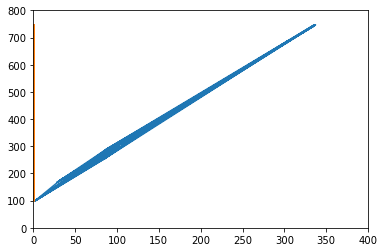

In [12]:
limsx = [0, 400]
limsy = [0, 800]
plt.xlim(limsx)
plt.ylim(limsy)

plt.plot()
plt.plot(X_test, predict)